Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# 1. Import the necessary libraries.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. First look at its main features (head, shape, info).

In [4]:
customer_df.isnull().sum()/len(customer_df)
#ZERO null values across all columns

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [5]:
customer_df.info()
#dtypes: float64(2), int64(6), object(16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores

In [6]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

print(customer_df.columns)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


# 5. Change effective to date column to datetime format.

In [7]:
#currently it's an object
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# 6. Define a function that differentiates between continuous and discrete variables. 

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
# Which variables are continuous, and which are discrete?
# a quantitative variable may be continuous or discrete if they are typically obtained by measuring or counting, respectively.
# discrete: counts (e.g. the number of objects in a collection). 
# continuous: measurable amounts (weight, speed, income)

# In other words... 
# discrete variable is obtained by counting 
# continuous variable is obtained by measuring

# Discrete- 
# months_since_last_claim 
# months_since_policy_inception
# number_of_open_complaints
# number_of_policies

# Continuous
# customer_lifetime_value - 8041
# income- 5694
# monthly_premium_auto - 202
# total_claim_amount - 5105

In [9]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
numericals.isnull().sum()/len(numericals)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [11]:
#shows number of unique values per column,
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [12]:
def cont_dis(df,limit):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= limit:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous

In [13]:
discrete_df, continuous_df = cont_dis(numericals,100)
print(discrete_df)
print(continuous_df)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


# 7. Plot a correlation matrix, comment what you see.

A correlation heatmap is a graphical representation of a correlation matrix representing the correlation 
between different variables. The value of correlation can take any value from -1 to 1

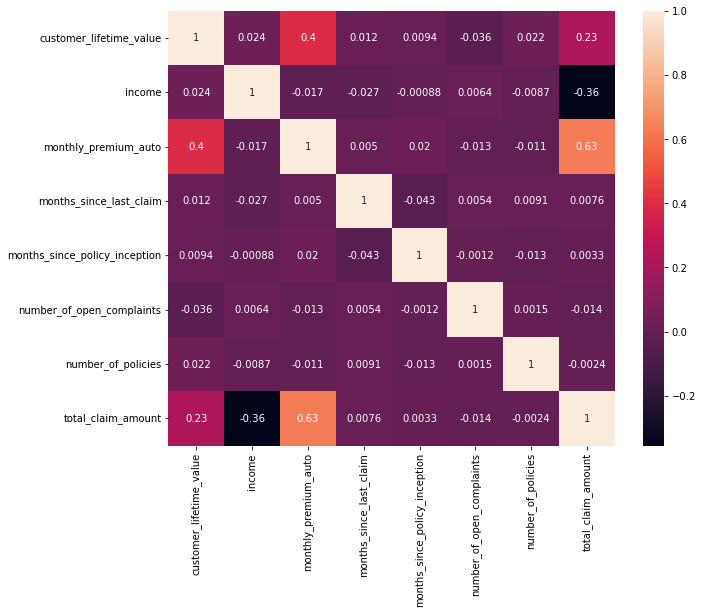

In [14]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
######################Comment########################

# We see a low correlation here
# 0.4 correlation between monthly_premium_auto and customer_lifetime_value (not significant)

# 0.63 correlation between monthly_premium_auto and total_claim_amount (also not so significant)

# Normally we try to look into values which is more than 0.90

########## Conclusion: no strong correlations overall, no features are extremely correlated #########

# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 

(Be Careful, you may need to change the plot type to one better suited for continuous data!)
Comment what you can see in the plots.

# Plotting every discrete Variable

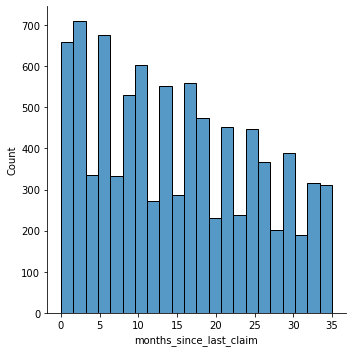

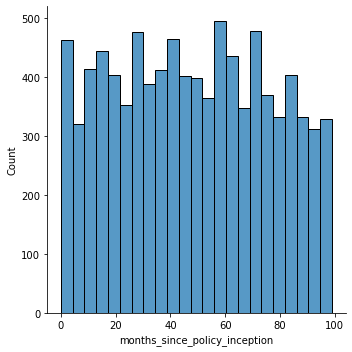

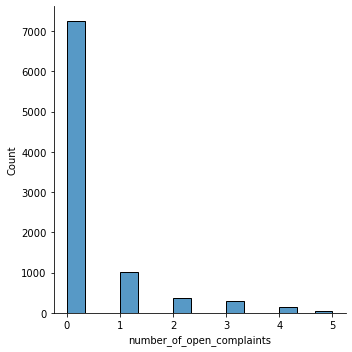

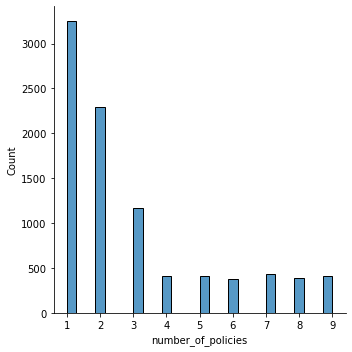

In [16]:
for column in numericals[discrete_df]:
    sns.displot(numericals[column])
    plt.show()

In [17]:
def disc_plot(df):
    for col in df[discrete_df]:
        sns.displot(df[col], kde=True)
        plt.show()

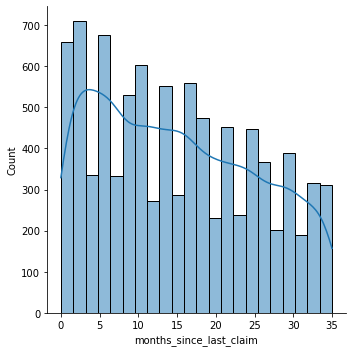

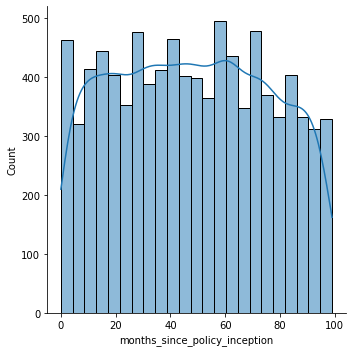

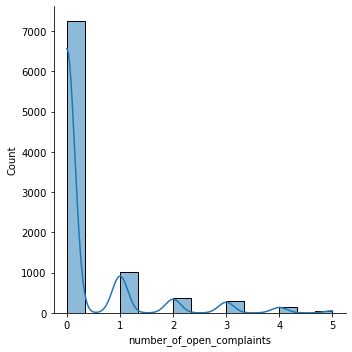

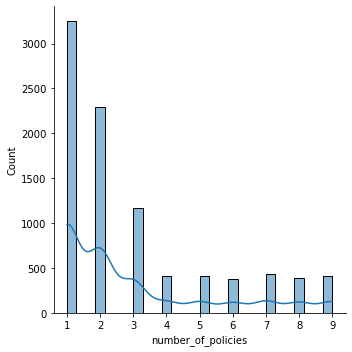

In [18]:
disc_plot(numericals)

In [19]:
def cont_plot(df):
    for col in df[continuous_df]:
        sns.histplot(df[col], kde=True)
        plt.show()

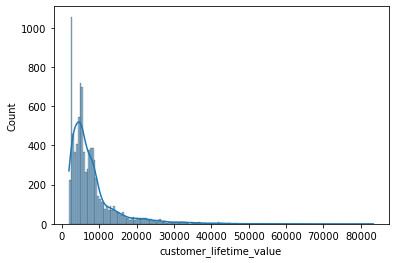

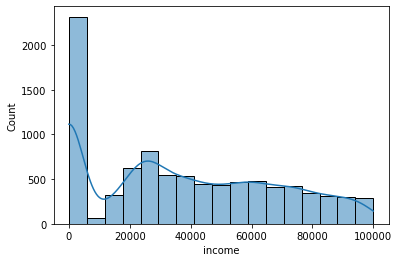

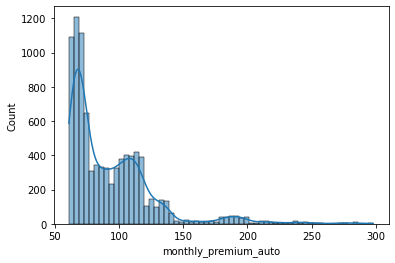

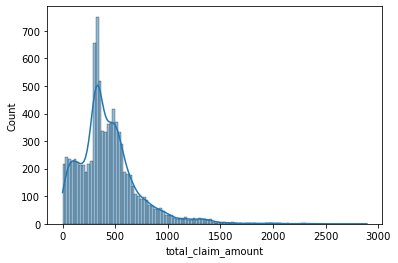

In [20]:
cont_plot(numericals)

In [21]:
#Comment what you can see in the above plots.

# all the continuous variables are skewed to the right
# number of open complaints and number of policies also skewed to the right


# 9. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [22]:
def cont_boxplot(df):
    for col in df[continuous_df]:
        sns.boxplot(df[col])
        plt.show()

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


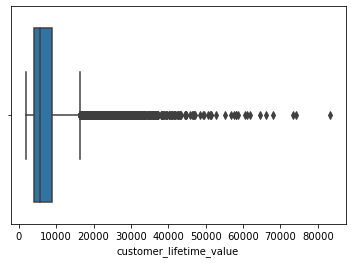

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


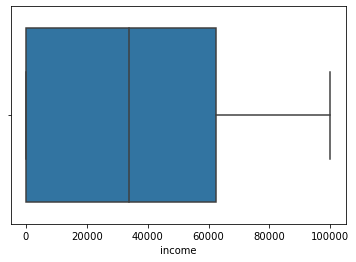

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


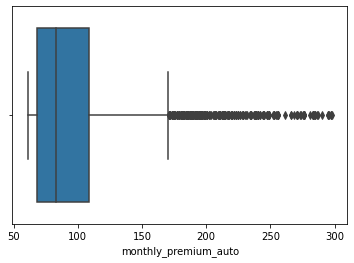

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


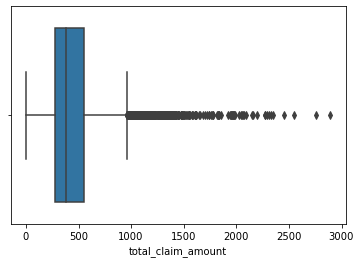

In [23]:
cont_boxplot(numericals)

In [24]:
#In a boxplot, define outliers as those values past the whiskers (“max whisker”: Q3 + 1.5*IQR)

#customer_lifetime_value: outliers start around $15,000 and many through $65,000, with a few still $65-85,000

#Income has no outliers

#Total claim amount: outliers start around the $1000 value, and there are many of them, between 1000 and 2000, and 
#between 2000 and 2500

#monthly premium auto: max whisker starts at around $165/month, then from $165- 300 there are A LOT of outliers



# 10. Did you find outliers? Comment what you will do with them.

# 11. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [25]:
customer_df.isnull().sum()/len(customer_df)

#######  No nulls  #######

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Lab 2 | Cleaning categorical data

In [26]:
#1 Import the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

# 2. Find all of the categorical data. Save it in a categorical_df variable.

In [27]:
categoricals_df = customer_df.select_dtypes(object)
display(categoricals_df.shape)
categoricals_df.head()

(9134, 15)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 3. Check for NaN values.

In [28]:
categoricals_df.isnull().sum()/len(categoricals_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

# 4 Check all unique values of columns.

In [29]:
categoricals_df.nunique() 

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# 5. Check dtypes. Do they all make sense as categorical data?

In [30]:
categoricals_df.dtypes
#Yes they all make sense as categorical data

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

# 6. Does any column contain alpha and numeric data? Decide how to clean it.

In [31]:
# Yes, the Customer column contains 2 letters and then 5 numbers, like: BU79786 or QZ44356
# Does it need to be cleaned? WE can simply reset the index and use the index as the customer id instead of 
# the 7 digit alphanumeric or drop that Customer column as i donot see it impacting 
# our overall model at the later stage of evaluation!!

# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [32]:
categoricals_df.gender.value_counts(dropna=False)
categoricals_df.policy_type.value_counts(dropna=False)
categoricals_df.marital_status.value_counts(dropna=False)
categoricals_df.coverage.value_counts(dropna=False)
categoricals_df.employmentstatus.value_counts(dropna=False)
categoricals_df.education.value_counts(dropna=False)

# I wouldn't do anything else. The only column that has more than 10 uniques is customer. 
# We need to check at a later stage to retain or to drop it. 
# No null values, no strange inputs

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [33]:
categoricals_df.policy.value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [34]:
categoricals_df.policy_type.value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [35]:
##### Comment #####

# seems like the POLICY column just further breaks down the policy_type column into L1, L2, L3
# For each (personal, corporate, special), L3 has the most values

# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [36]:
categoricals_df.nunique() 

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# Lab 3 | Feature extraction

# 1. Open the categoricals variable we created before.

In [37]:
categoricals_df = categoricals_df.select_dtypes(object)
categoricals_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 2. Plot all the categorical variables with the proper plot. What can you see?

In [38]:
def cat_var(df):
    for col in df:
        sns.displot(df[col], kde=True)
        plt.show()

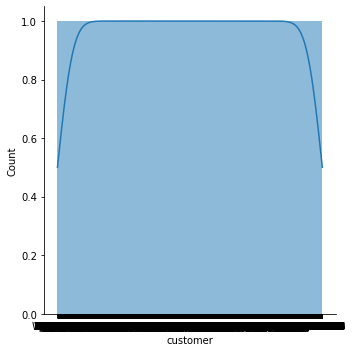

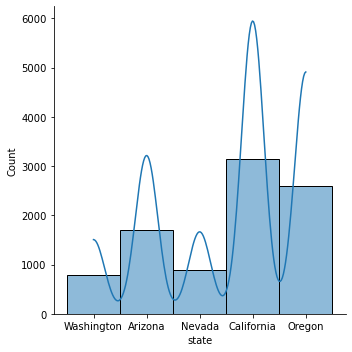

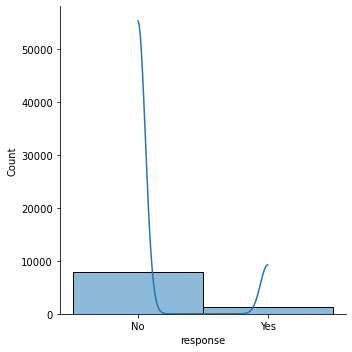

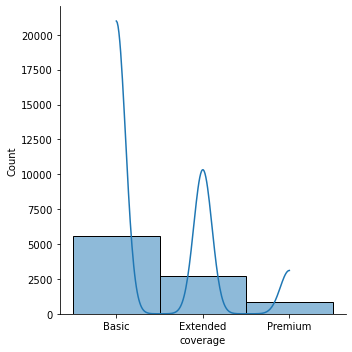

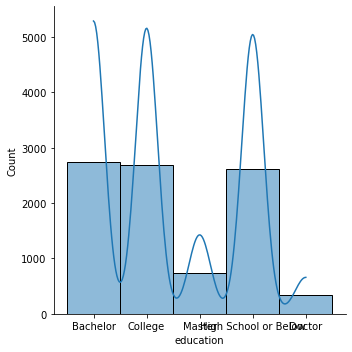

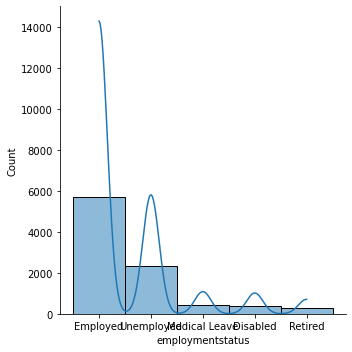

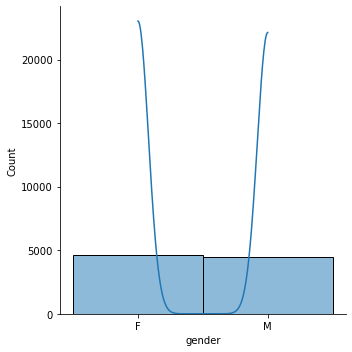

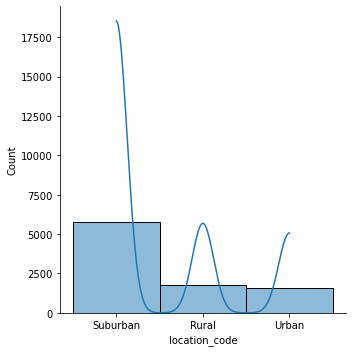

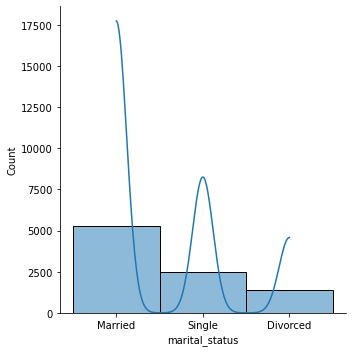

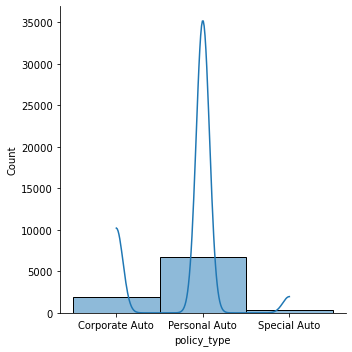

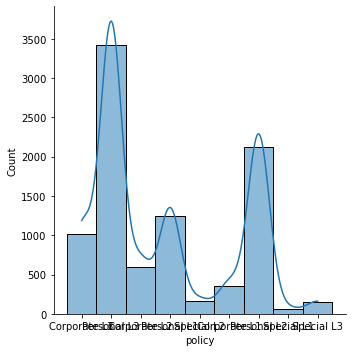

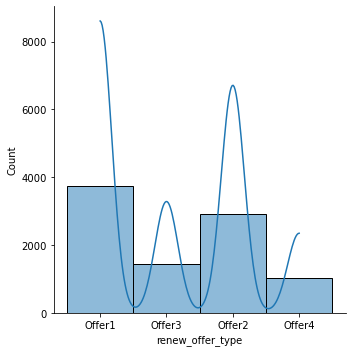

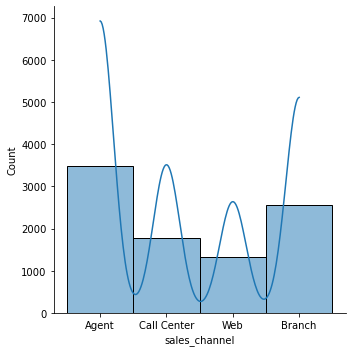

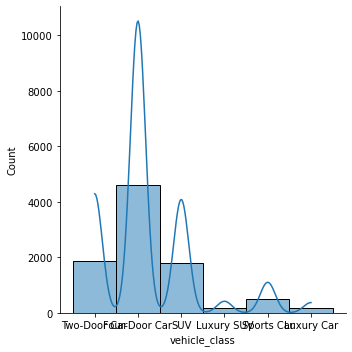

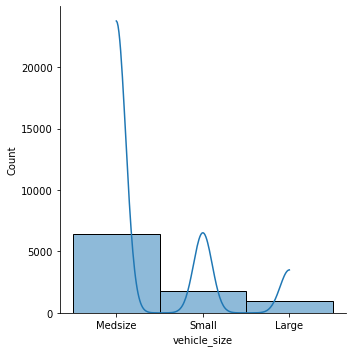

In [39]:
cat_var(categoricals_df)

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

# 4. Plot time variable. Can you extract something from it?

In [40]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

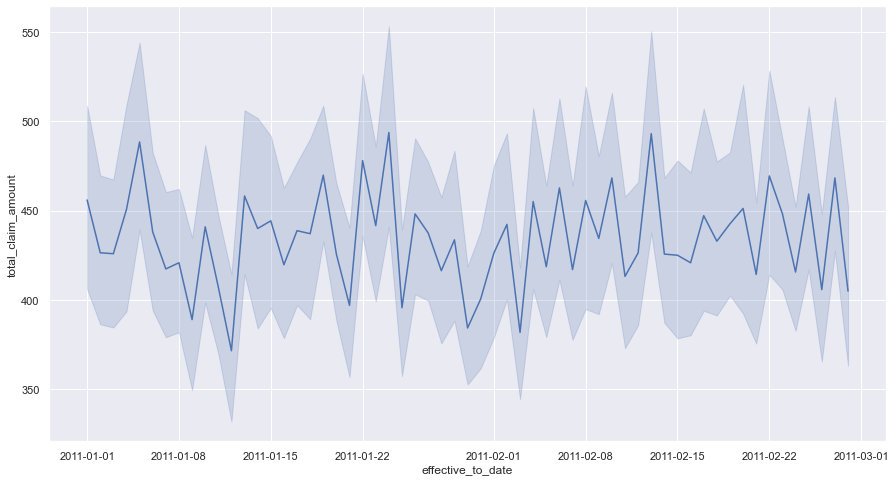

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='effective_to_date', y="total_claim_amount", data= customer_df)